In [1]:
import pandas as pd;
import geopandas as gp;



### Introduction
In this project, we tried to use methods like pandas and geo-pandas to figure out which neighborhood is the best in Pittsburgh city. To measure whether a neighborhood is good or not, our group chose standards such as the safety, how convenient to get the sport facilities such as playgrounds, and far away from the waste recovery locations.


## Metric
#### 1.Blotter Data (to measuere whether the neighborhood is safe or not)

##### initial crime incident data  >>  lowest number of crimes

#### 2.Population of Pittsburgh (to calculate the crime per person)
    
##### use theincident data divided by the population in each neighborhood  >>  incident per person

#### 3. Pittsburgh playground dataset(to see whether that neighborhhod has more sport facilities)

##### The number of playground and locations >> which area is easy for resisdent to get sport facilities

#### 4. Waste Recovery Locations (these waste recovery stations are noisy, so a good neighborhhod should far away from them)

##### the location of waste recovery stations and the number of them in one neighborhood >> a good neighborhood should be far away from waste recovery station

### import blotter dataset and use geopandas to show a map of which area has higher incident in last 30 days

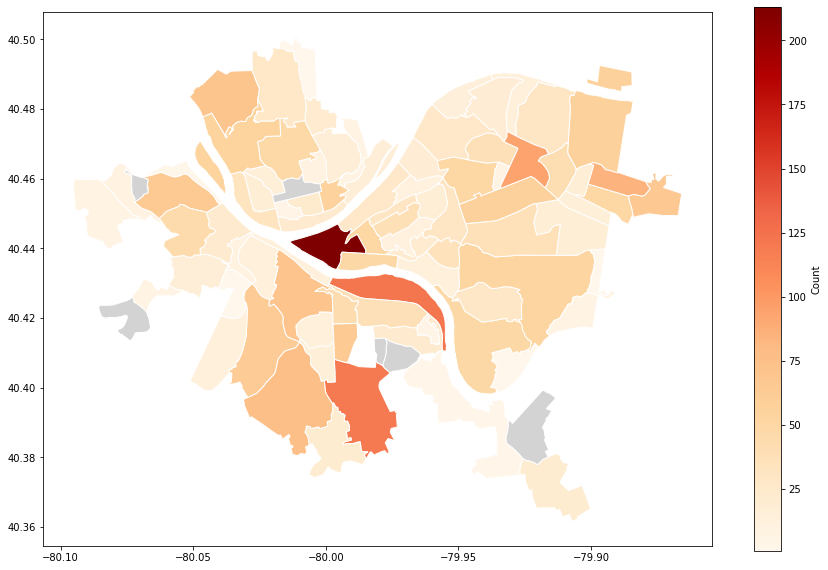

In [2]:
blotter=pd.read_csv("Blotter Data.csv") # read the blotter data

neighborhoods = gp.read_file("data/Neighborhoods_.shp") # read in the shapefile

#neighborhoods.plot() # plot the geopandas dataframe
df2=blotter["INCIDENTNEIGHBORHOOD"].value_counts()
df3=pd.DataFrame({'Neighborhood':df2.index, 'count':df2.values})
df3

map = neighborhoods.merge(df3, how='left', left_on='hood', right_on="Neighborhood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)

### read the population dataset and merge the population with the blotter dataframe to calculate the incident per person

In [4]:

population=pd.read_csv("population.csv")
population
crime_df=pd.merge(df3, population, how='inner', on=['Neighborhood', 'Neighborhood'])
crime_df['incidents_rate'] = crime_df['count'].div(crime_df['2020_Total_Population'])
#crime_df

crimerate= crime_df.sort_values(by="incidents_rate",ascending=True)
crimerate.head(10)

,Neighborhood,count,2020_Total_Population,incidents_rate
78,Summer Hill,2,998,0.002004
77,Regent Square,2,971,0.002060
79,Ridgemont,1,390,0.002564
31,North Oakland,30,10691,0.002806
76,Glen Hazel,2,659,0.003035
28,Squirrel Hill North,37,11879,0.003115
47,Point Breeze,18,5348,0.003366
59,Banksville,14,4127,0.003392
15,Squirrel Hill South,53,15317,0.003460
12,Shadyside,57,15317,0.003721


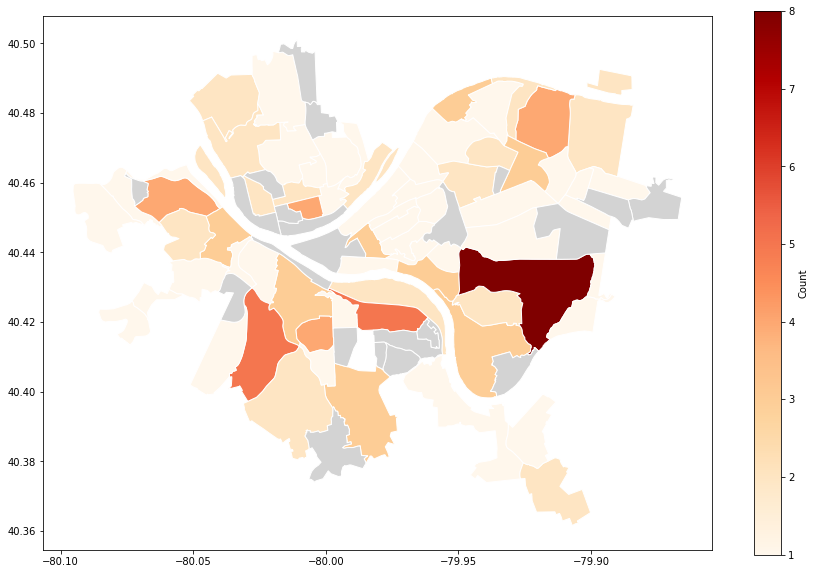

In [3]:
playground=pd.read_csv("Playgrounds.csv")
pg_neighborhoods = gp.read_file("data/Neighborhoods_.shp") 
playgrounds=playground["neighborhood"].value_counts()
pgcounts=pd.DataFrame({'neighborhood':playgrounds.index, 'count':playgrounds.values})
#pgcounts.plot()
#pgcounts.plot(kind="bar")
map = pg_neighborhoods.merge(pgcounts, how='left', left_on='hood', right_on="neighborhood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)

In [4]:
WRlocations=pd.read_csv("Waste Recovery Locations.csv")
#WRlocations
WRlocation_hood=WRlocations["neighborhood"].value_counts()
WRlocation_hood_dict=pd.DataFrame({'neightHood':WRlocation_hood.index, 'count':WRlocation_hood.values})

<AxesSubplot:>

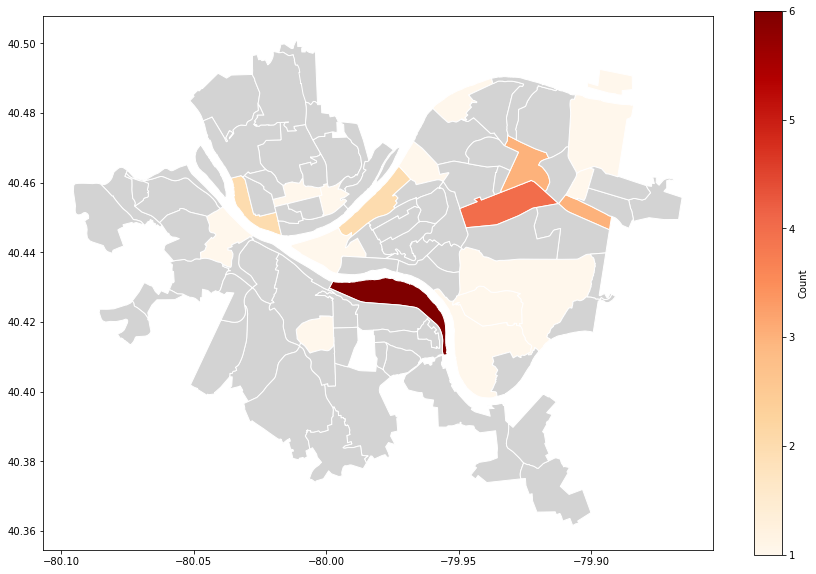

In [5]:
neighborhood = gp.read_file("data/Neighborhoods_.shp")
map = neighborhood.merge(WRlocation_hood_dict, how='left', left_on='hood', right_on="neightHood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)